## Loss Functions for Linear Regression
Given $(\mathbf{x}_i,y_i) \in \mathbb{R}^p \times \mathbb{R}$ for $i = 1, \ldots, m$, the linear regression algorithm uses the mean squared error cost function. This cost function is always convex for a linear function $\hat{y} = {\mathbf{\theta}^\top}\mathbf{x}_i + \mathbf{\theta}_0$. In other words, the cost function always approaches its global minimum during training.

The loss function used for training the linear regression algorithm is the mean-squared error (MSE). It is given mathematically as:

$$J(\mathbf{\theta}) = \frac{1}{2m}||\mathbf{y}-\hat{\mathbf{y}}||^2 = \frac{1}{2m}\sum_i^m (y_i - \hat{y_i})^2$$

<hr> </hr>

### Gradient:

The gradient of $J(\mathbf{\theta})$ wrt $\mathbf{\theta}$ is calculated as:

$$\nabla_{\mathbf{\theta}} J = {1 \over m}\sum^m_{i=1}\bigg[(\hat{y_i} – y_i)\mathbf{x}_i \bigg],$$and the gradient descent update rule is given as follows:

$$ \theta^{t+1} = Proj_{\chi}(\theta^{t+1} - \rho \nabla_{\mathbf{\theta}} J),$$
where $\chi$ is a set of interest.


## Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

# Gradient Descent Class

In [3]:
def proj(vector):
    """
    Implement the projection here.
    """
    pass

class GD:
    def __init__(self, theta_init, lr=0.0001, max_iter=100):
        self.lr = lr
        self.max_iter = max_iter
        self.theta_init = theta_init

    # Hypothesis function
    def predict(self, theta, x):
        return x @ theta
    
    # Loss function
    def J(self, prediction, y):
        n = y.shape[0]
        error_vec = prediction - y
        loss = (0.5 / n ) * (error_vec.T @ error_vec)[0][0]

        return loss, error_vec    
    
    @staticmethod
    def reshape(x):
      x = np.block([np.ones((x.shape[0], 1)), x])
      return x

    # Gradient descent algorithm
    def fit(self, x, y):
        
        x = GD.reshape(x)
        
        # Number of features (X)
        n = x.shape[1]
        # theta = np.zeros((n, 1))
        theta = self.theta_init
        
        # Lists for holding loss and model parameters
        MSE = []
        th = []

        for epoch in range(self.max_iter):
            
            # Predicted value of output
            y_pred = self.predict(theta, x)

            # Calculate loss
            loss, e = self.J(y_pred, y)
            MSE.append(loss)
            th.append(theta)

            # Gradient of loss function with respect to theta
            grad_theta = (x.T @ e) * (1 / n)     
            # Update theta. Notice the projection!
            theta = proj(theta - self.lr * grad_theta)
            
        return th, MSE

## Plotting functions

In [4]:
def reg_line(x, y, y_pred):   
    plt.scatter(x, y, label='Actual') 
    plt.title('Regression line')
    plt.plot(x, y_pred, color='red', label='Predicted')  # regression line
    plt.xlabel("Input (x)")
    plt.ylabel("Output (y)")
    plt.grid()
    plt.legend()
    plt.show()

In [5]:
def visualize(theta, loss):

  plt.figure(figsize = (15, 10))

  #  For Loss Converegnce wrt to theta
  # --------------------------------------------------------------------------------------------
  plt.subplot(2, 2, 1)
  plt.plot(np.array(loss), '--bo', mfc='r', mec='none', markersize=5)
  # plt.title(f'Loss (MSE) = {np.round(loss[-1],2)}')
  plt.title('Loss vs #epochs')
  plt.xlabel("No. of epochs (e)")
  plt.ylabel(r"Loss ($J$) (log-scale)")
  plt.yscale('log')
  plt.grid()


  #  For Loss Converegnce wrt to theta
  # --------------------------------------------------------------------------------------------
  plt.subplot(2, 2, 2)
  plt.plot(np.linalg.norm(theta, axis = 1), np.array(loss), '--bo', mfc='r', mec='none', markersize=5)
  plt.title(r'Loss vs $||\theta||$')
  plt.xlabel(r"$||\theta||$")
  plt.ylabel(r"Loss ($J$) (log-scale)")
  plt.yscale('log')
  plt.grid()

  #  For loss convergence wrt individual theta components
  # ------------
  # wrt theta_0
  # ------------
  plt.subplot(2, 4, 5)
  plt.plot(theta[:, [0], [0]], loss, '--bo', mfc='red', mec='none', markersize=5)
  plt.title('Loss vs theta {}'.format(0))
  plt.xlabel(r'$\theta_{}$'.format(0))
  plt.ylabel(r'$J(\theta_{}$)'.format(0))
  plt.grid()


  # -------------------
  # wrt theta_1
  # -------------------   
  plt.subplot(2, 4, 6)
  plt.plot(theta[:, [1], [0]], loss, '--bo', mfc='red', mec='none', markersize=5)
  plt.title('Loss vs theta {}'.format(1))
  plt.xlabel(r'$\theta_{}$'.format(1))
  plt.ylabel(r'$J(\theta_{}$)'.format(1))
  plt.grid()


  # -------------------
  # wrt theta_2
  # -------------------
  plt.subplot(2, 4, 7)
  plt.plot(theta[:, [2], [0]], loss, '--bo', mfc='red', mec='none', markersize=5)
  plt.title('Loss vs theta {}'.format(2))
  plt.xlabel(r'$\theta_{}$'.format(2))
  plt.ylabel(r'$J(\theta_{}$)'.format(2))
  plt.grid()


  # -------------------
  # wrt theta_3
  # -------------------
  plt.subplot(2, 4, 8)
  plt.plot(theta[:, [3], [0]], loss, '--bo', mfc='red', mec='none', markersize=5)
  plt.title('Loss vs theta {}'.format(3))
  plt.xlabel(r'$\theta_{}$'.format(3))
  plt.ylabel(r'$J(\theta_{}$)'.format(3))
  plt.grid()

  plt.tight_layout()
  plt.show()

# Multivariable Case
## Loading data

In [6]:
# Dataframe from csv file, replace it with your local path!
PATH = r'C:\Users\...\MultipleLR.csv'
df = pd.read_csv(PATH, header=None)
# df = pd.read_csv('MultipleLR.csv', header=None)
data = df.to_numpy()

print("Shape of data: ", data.shape)
data[:5,:]

Shape of data:  (25, 4)


array([[ 73,  80,  75, 152],
       [ 93,  88,  93, 185],
       [ 89,  91,  90, 180],
       [ 96,  98, 100, 196],
       [ 73,  66,  70, 142]], dtype=int64)

In [7]:
y = data[:, [-1]]
x = data[:, 0:3]
x[:5,:]

array([[ 73,  80,  75],
       [ 93,  88,  93],
       [ 89,  91,  90],
       [ 96,  98, 100],
       [ 73,  66,  70]], dtype=int64)

##Train/test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Model initialization

In [9]:
np.random.seed(42)
# feel free to play with initialization
theta_init = np.random.normal(size=(X_train.shape[1]+1, 1))
model = GD(theta_init, lr=0.000001, max_iter=50)

## Model training

In [10]:
theta, loss = model.fit(X_train, y_train)

In [11]:
loss[-1]

3471.718055576434

In [12]:
theta[-1]

array([[0.        ],
       [0.        ],
       [0.03981872],
       [0.96018128]])

## Training graphs

In [13]:
theta[0]

array([[ 0.49671415],
       [-0.1382643 ],
       [ 0.64768854],
       [ 1.52302986]])

In [19]:
theta[1]

array([[ 0.        ],
       [-0.        ],
       [ 0.06235318],
       [ 0.93764682]])

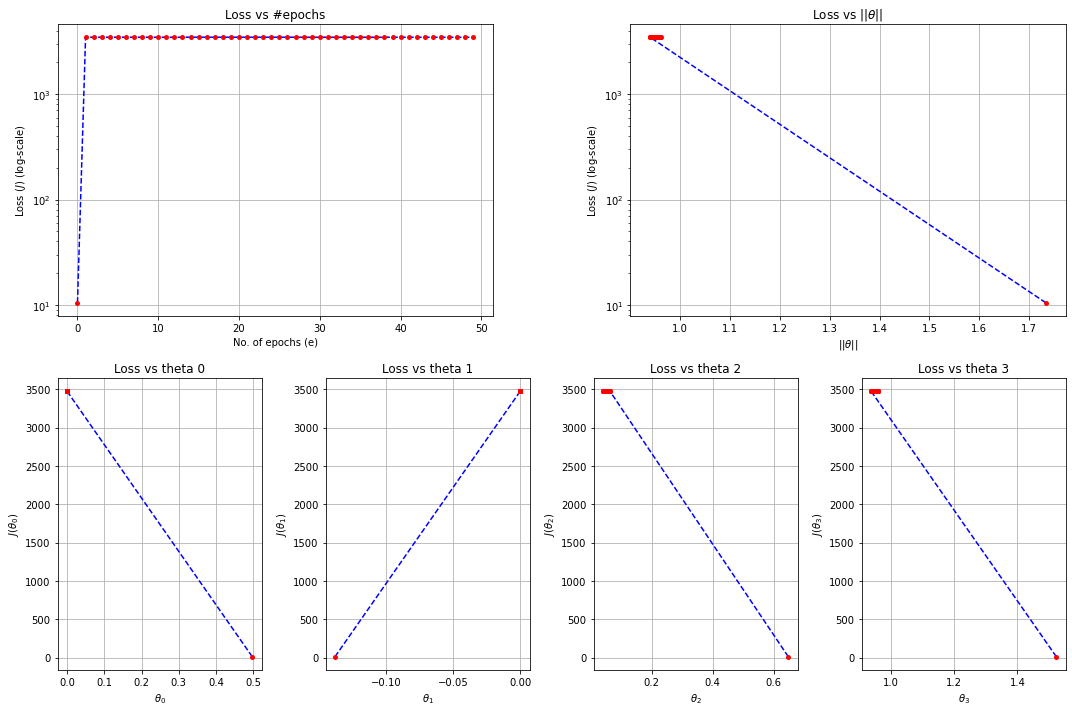

In [14]:
visualize(np.array(theta), loss)

## Training evaluation

In [15]:
y_pred = model.predict(theta[-1], GD.reshape(X_train))
print(f'The r2_score for training is {r2_score(y_train, y_pred)}')

The r2_score for training is -14.76164055854145


## Predictions

In [16]:
y_pred = model.predict(theta[-1], GD.reshape(X_test))
y_pred

array([[54.64163155],
       [90.03981872],
       [77.2389123 ],
       [68.27873102],
       [73.64163155]])

In [17]:
y_test

array([[101],
       [180],
       [159],
       [147],
       [141]], dtype=int64)

## Test evaluation

In [18]:
print(f'The r2_score for test is {r2_score(y_test, y_pred)}')

The r2_score for test is -7.195365013699906
